# Lets use the actual quantum computer

In [20]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.tools.visualization import plot_histogram

from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor


import matplotlib.pyplot as plt
import numpy as np

- Sign up for a (free account) at the [IBM quantum experience](https://quantumexperience.ng.bluemix.net/qx/experience)
- In account settings, generate a token

In [6]:
token = ''
IBMQ.enable_account(token)

Check what backends (i.e. quantum computers) are availible to you

In [7]:
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

see which one is the least busy:

In [8]:
from qiskit.providers.ibmq import least_busy

small_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits == 5 and
                                                       not x.configuration().simulator)
least_busy(small_devices)

<IBMQBackend('ibmqx4') from IBMQ()>

OK lets use that!

In [19]:
backend = IBMQ.get_backend('ibmqx4')
print(backend.name())
print(backend.status())

ibmqx4
BackendStatus(backend_name='ibmqx4', backend_version='1.0.0', operational=True, pending_jobs=1, status_msg='active')


OK lets build the circuit:

In [38]:
# Build Circuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.cx(q[0], q[2])

# #local operations
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.s(q[0])
qc.s(q[1])
qc.s(q[2])

# # # Measurement 1
# qc.barrier()
# qc.z(q[0])
# qc.z(q[1])
# qc.z(q[2])

# # # Measurement 2
# qc.barrier()
# qc.z(q[0])
# qc.h(q[1])
# qc.h(q[2])

# # Measurement 3
# qc.barrier()
# qc.h(q[0])
# qc.z(q[1])
# qc.h(q[2])

# Measurement 4
qc.barrier()
qc.h(q[0])
qc.h(q[1])
qc.z(q[2])

qc.measure(q, c)

job4 = execute(qc, backend)
job_monitor(job4, monitor_async=True)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [12]:
job

#### Measurement 1 (ZZZ)

{'001': 60, '111': 11, '101': 195, '110': 188, '100': 85, '010': 60, '011': 173, '000': 252}
win count = 808


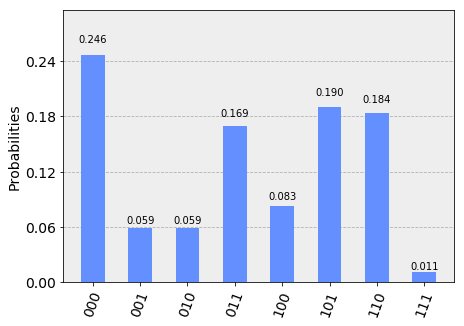

In [32]:
result1 = job1.result()
counts = result1.get_counts()
print(counts)
win_ct_1 = counts['000']+counts['011']+counts['101']+counts['110']
print('win count = {}'.format(win_ct_1))
plot_histogram(counts)

#### Measurement 2 (ZHH)

{'001': 195, '111': 160, '101': 66, '110': 52, '100': 246, '010': 174, '011': 36, '000': 95}
win count = 775


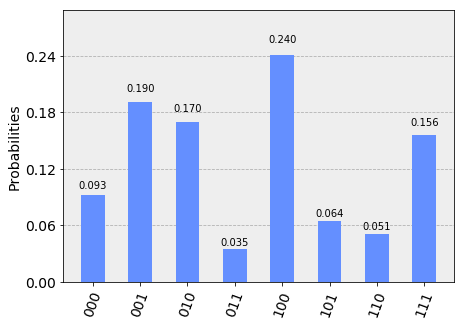

In [34]:
result2 = job2.result()
counts = result2.get_counts()
print(counts)
win_ct_2 = counts['001']+counts['010']+counts['100']+counts['111']
print('win count = {}'.format(win_ct_2))
plot_histogram(counts)

#### Measurement 3 (HZH)

{'001': 224, '111': 180, '101': 75, '110': 39, '100': 204, '010': 179, '011': 35, '000': 88}
win count = 787


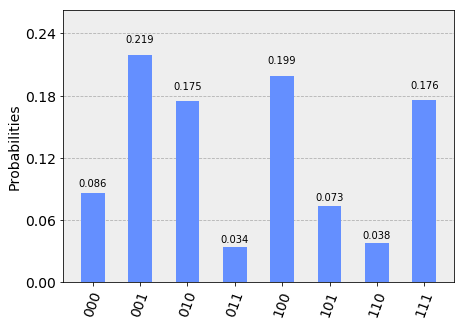

In [36]:
result3 = job3.result()
counts = result3.get_counts()
print(counts)
win_ct_3 = counts['001']+counts['010']+counts['100']+counts['111']
print('win count = {}'.format(win_ct_3))
plot_histogram(counts)

#### Measurement 4 (ZHH)

{'001': 233, '111': 161, '101': 61, '110': 44, '100': 208, '010': 188, '011': 47, '000': 82}
win count = 787


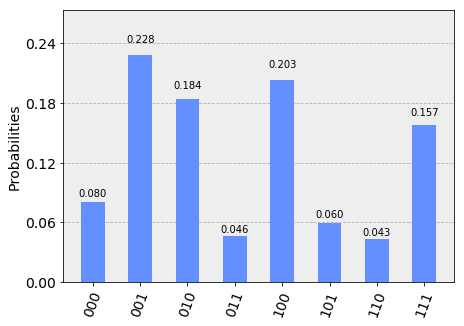

In [39]:
result4 = job4.result()
counts = result4.get_counts()
print(counts)
win_ct_4 = counts['001']+counts['010']+counts['100']+counts['111']
print('win count = {}'.format(win_ct_3))
plot_histogram(counts)

### Are we quantum?

In [48]:
tot_win_ct = float(win_ct_1+win_ct_2+win_ct_3+win_ct_4)
print('Win: {} +/- {}'.format(tot_win_ct/(4*1024), np.sqrt(tot_win_ct)/(4*1024)))

Win: 0.771484375 +/- 0.013724091135307809


Try for entangling to q[2] ? Any better?

In [51]:
# Build Circuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)
qc.h(q[2])
qc.cx(q[2], q[0])
qc.cx(q[2], q[1])

# #local operations
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.s(q[0])
qc.s(q[1])
qc.s(q[2])

# # Measurement 1
qc.barrier()
qc.z(q[0])
qc.z(q[1])
qc.z(q[2])

# # # Measurement 2
# qc.barrier()
# qc.z(q[0])
# qc.h(q[1])
# qc.h(q[2])

# # Measurement 3
# qc.barrier()
# qc.h(q[0])
# qc.z(q[1])
# qc.h(q[2])

# # Measurement 4
# qc.barrier()
# qc.h(q[0])
# qc.h(q[1])
# qc.z(q[2])

qc.measure(q, c)

job5 = execute(qc, backend)
job_monitor(job5, monitor_async=True)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

{'001': 60, '111': 21, '101': 228, '110': 175, '100': 71, '010': 51, '011': 200, '000': 218}
win count = 821


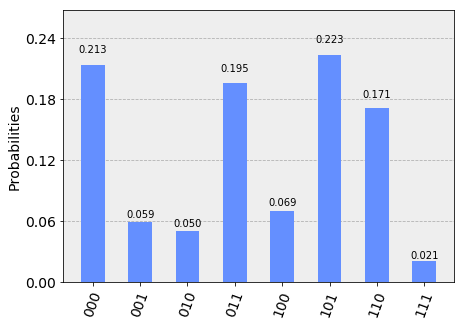

In [52]:
result5 = job5.result()
counts = result5.get_counts()
print(counts)
win_ct_5 = counts['000']+counts['011']+counts['101']+counts['110']
print('win count = {}'.format(win_ct_5))
plot_histogram(counts)

Not really no. Final thing to try, the one described on the [IBM Website](https://quantumexperience.ng.bluemix.net/proxy/tutorial/full-user-guide/003-Multiple_Qubits_Gates_and_Entangled_States/003-GHZ_States.html)  

In [53]:
# Build Circuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.h(q[1])
qc.x(q[2])

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])

# #local operations
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

# # Measurement 1
qc.barrier()
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

# # # Measurement 2
# qc.barrier()
# qc.z(q[0])
# qc.h(q[1])
# qc.h(q[2])

# # Measurement 3
# qc.barrier()
# qc.h(q[0])
# qc.z(q[1])
# qc.h(q[2])

# # Measurement 4
# qc.barrier()
# qc.h(q[0])
# qc.h(q[1])
# qc.z(q[2])

qc.measure(q, c)

job6 = execute(qc, backend)
job_monitor(job6, monitor_async=True)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

{'001': 198, '111': 166, '101': 70, '110': 41, '100': 219, '010': 219, '011': 32, '000': 79}
win count = 802


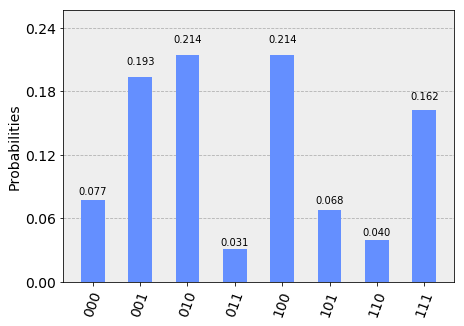

In [55]:
result6 = job6.result()
counts = result6.get_counts()
print(counts)
win_ct_6 = counts['001']+counts['010']+counts['100']+counts['111']
print('win count = {}'.format(win_ct_6))
plot_histogram(counts)

No better.... interesting to understand where the error comes from!